Import dependencies and fetch dataset

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [3]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

Visualize the data

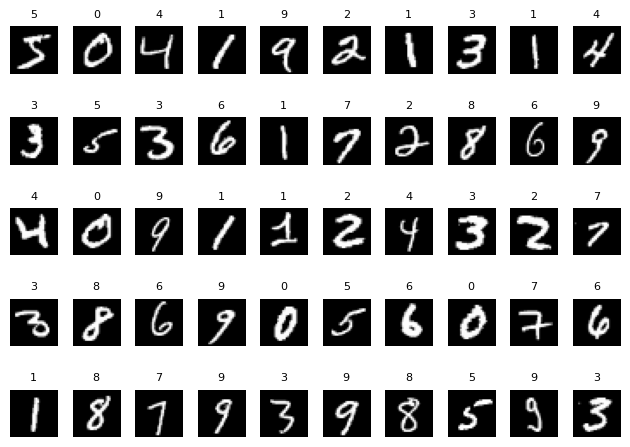

In [4]:
fig, ax = plt.subplots(5, 10)

axes = ax.flatten()

for i in range(50):
    # Convert the row into a 28x28 array
    image = X.iloc[i].values.reshape(28, 28)

    # Display the image
    axes[i].imshow(image, cmap='gray')

    # Hides the axis mark
    axes[i].axis('off')

    axes[i].set_title(y[i], fontsize=8)

plt.tight_layout()
plt.show()

Split the data into train and test subsets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Train the model

In [6]:
clf = MLPClassifier(solver='adam', alpha=0.01, hidden_layer_sizes=(100,100), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), random_state=1)

In [7]:
score = clf.score(X_test, y_test)
print('Accuracy: ',score)

Accuracy:  0.9672294372294372


Visualize predictions

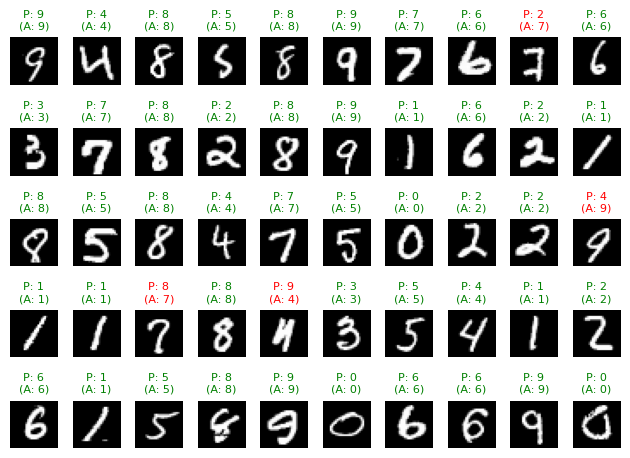

In [14]:
y_pred = clf.predict(X_test)

fig2, ax2 = plt.subplots(5, 10)
axes2 = ax2.flatten()

for i in range(50):
    image = X_test.iloc[i].values.reshape(28, 28)

    axes2[i].imshow(image, cmap='gray')
    axes2[i].axis('off')

    actual = y_test.iloc[i]
    prediction = y_pred[i]

    color = 'green' if str(actual) == str(prediction) else 'red'

    axes2[i].set_title(f"P: {prediction}\n(A: {actual})", fontsize=8, color=color)

plt.tight_layout()
plt.show()